In [1]:
#Data set has been obtained from Kaggle Data Sources for Data Analytics
#Data set is all about Video Games Sales as of 22 Dec 2016 for around 16000+ titles
#Following are the questions we will try to answer based on the available data

# Questions:
# 1. Which game has raked in the highest sales
# 2. Which publisher has raked in the highest sales. Which games are the top 5 contributors of that publisher.
# 3. Which genre has raked in the highest sales. Which publisher are the top 5 contributors of that genre.
# 4. Top 5 years by sales across publishers[top 5] X games[top 5] X genre[top 5]
# 5. Which publisher[with genre breakout] got highest critic ratings amonst all as per top publishers with most critic numbers
# 6. Which publisher[with genre breakout] got highest user ratings amonst all as per top publishers with most user numbers
# 7. See if there is any correlation between Critics Score and Gaming Sales, User Scores and Gaming Sales and between Critics Score and User Score to see hoe much user percepetion and critic perception align

In [2]:
# Few important imports
%matplotlib inline
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from IPython.display import display, HTML ,display_html

CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
    
CSV_URL = 'https://github.com/Mehul-Chhaya-2711/Documents-to-play-with/raw/main/Video_Games_Sales_as_at_22_Dec_2016.csv'
Videogames_Sales = pd.read_csv(CSV_URL)

In [3]:
# Let us get some basic information about the data set at hand
# 1. Get the look and feel of dataset
# 2. Get an idea of columns at hand
# 3. Drop duplicate records if any

print(Videogames_Sales.columns)   #this will get us the distinct columns at hand
Videogames_Sales.drop_duplicates()

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Let us get the number of unique Games, Genres, Publishers etc

print('Unique Counts per Column: \n',Videogames_Sales.nunique())

Unique Counts per Column: 
 Name               11562
Platform              31
Year_of_Release       39
Genre                 12
Publisher            582
NA_Sales             402
EU_Sales             307
JP_Sales             244
Other_Sales          155
Global_Sales         629
Critic_Score          82
Critic_Count         106
User_Score            95
User_Count           888
Developer           1696
Rating                 8
dtype: int64


In [5]:
#One last addition of data
Videogames_Sales['Total_Sales'] = Videogames_Sales['NA_Sales'] + Videogames_Sales['EU_Sales'] + Videogames_Sales['JP_Sales'] + Videogames_Sales['Other_Sales'] + Videogames_Sales['Global_Sales']

In [6]:
#Let us replace all the NaN records by 0 to make them calculation freindly
Videogames_Sales.fillna (0)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Total_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,165.07
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0.0,0.0,0.0,0.0,0,0,80.48
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,71.04
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,65.54
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0.0,0.0,0.0,0.0,0,0,62.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,0.0,0.0,0.0,0.0,0,0,0.02
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,0.0,0.0,0.0,0.0,0,0,0.02
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,0.0,0.0,0.0,0.0,0,0,0.02
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,0.0,0.0,0.0,0.0,0,0,0.02


In [7]:
#Answer 1

answer1_df = Videogames_Sales['Total_Sales'].groupby(Videogames_Sales['Name']).sum()
print('Game with highest Sales across years has been >>:',answer1_df.idxmax())

Game with highest Sales across years has been >>: Wii Sports


Publisher with highest Sales across years has been  Nintendo
Top 5 games are: ['Wii Sports', 'Super Mario Bros.', 'Tetris', 'Mario Kart Wii', 'Wii Sports Resort']


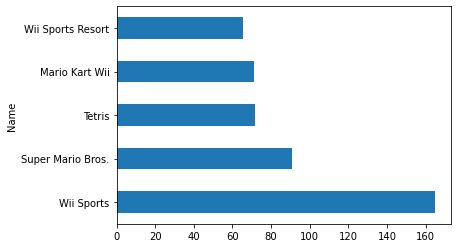

In [8]:
#Answer 2

answer2_df     = Videogames_Sales['Total_Sales'].groupby(Videogames_Sales['Publisher']).sum()
Top_Publisher  = answer2_df.idxmax()   #this is max function over a series
answer_2_a_df  = Videogames_Sales.loc[Videogames_Sales['Publisher'] == Top_Publisher]
Top_Games_List = answer_2_a_df['Total_Sales'].groupby(answer_2_a_df['Name']).sum()
Answer_series  = Top_Games_List.sort_values(ascending = False)[:5]
print('Publisher with highest Sales across years has been ',Top_Publisher)
Answer_series.plot(kind='barh', alpha=1)
print('Top 5 games are:',list(Answer_series.index))

Genre with highest Sales across years has been  Action
Top 5 publishers are: ['Take-Two Interactive', 'Ubisoft', 'Activision', 'Nintendo', 'Warner Bros. Interactive Entertainment']


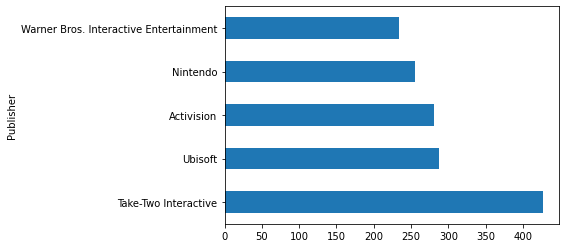

In [9]:
#Answer 3

answer3_df     = Videogames_Sales['Total_Sales'].groupby(Videogames_Sales['Genre']).sum()
Top_Genre      = answer3_df.idxmax()   #this is max function over a series
answer_3_a_df  = Videogames_Sales.loc[Videogames_Sales['Genre'] == Top_Genre]
Top_Games_List = answer_3_a_df['Total_Sales'].groupby(answer_3_a_df['Publisher']).sum()
Answer_series  = Top_Games_List.sort_values(ascending = False)[:5]
print('Genre with highest Sales across years has been ',Top_Genre)
Answer_series.plot(kind='barh', alpha=1)
print('Top 5 publishers are:',list(Answer_series.index))

In [10]:
# Answer 4

top_5_years       =  ((Videogames_Sales['Total_Sales'].groupby(Videogames_Sales['Year_of_Release']).sum()).sort_values(ascending = False)).head(5)
data_frame_by_top_5_years = Videogames_Sales.loc[Videogames_Sales['Year_of_Release'].isin(list(top_5_years.index))]
             
print('Top 5 years by sales are \n')
print(list(top_5_years.index),'\n')
    
Final_Result = DataFrame()
for years in list(top_5_years.index):
    dummy_df = data_frame_by_top_5_years.loc[data_frame_by_top_5_years['Year_of_Release'] == years]
    answer4_publisher =  dummy_df['Total_Sales'].groupby([dummy_df['Publisher']]).sum().sort_values(ascending = False).head(5)
    answer4_games =  dummy_df['Total_Sales'].groupby([dummy_df['Name']]).sum().sort_values(ascending = False).head(5)
    answer4_genre =  dummy_df['Total_Sales'].groupby([dummy_df['Genre']]).sum().sort_values(ascending = False).head(5)
    result = DataFrame(pd.concat((answer4_publisher,answer4_games,answer4_genre),keys = ['Publisher','Games','Genre']))  #This will basically provide with hierarchical indexing
    result['Year'] = int(years)
    Final_Result = pd.concat((Final_Result,result))
    
Final_Result_1 = Final_Result.reset_index()  
Final_Result_1 = Final_Result_1.rename(columns = {'level_0':'Category','level_1':'Name'})

for years in list(top_5_years.index):
    print(years)
    display(Final_Result_1.loc[Final_Result_1['Year'] == years])
    print('\n')
    
#How to read the output ? In the top 5 years by sales; in 2008 ; across publishers,games and genres; following are the 5 names and their top sales records    

Top 5 years by sales are 

[2008.0, 2009.0, 2007.0, 2010.0, 2006.0] 

2008.0


,Category,Name,Total_Sales,Year
0,Publisher,Nintendo,179.97,2008
1,Publisher,Electronic Arts,166.79,2008
2,Publisher,Activision,133.75,2008
3,Publisher,Ubisoft,113.74,2008
4,Publisher,Take-Two Interactive,91.71,2008
5,Games,Mario Kart Wii,71.04,2008
6,Games,Grand Theft Auto IV,44.76,2008
7,Games,Call of Duty: World at War,31.56,2008
8,Games,Super Smash Bros. Brawl,25.68,2008
9,Games,Star Wars: The Force Unleashed,20.07,2008




2009.0


,Category,Name,Total_Sales,Year
15,Publisher,Nintendo,254.80,2009
16,Publisher,Electronic Arts,170.57,2009
17,Publisher,Activision,154.36,2009
18,Publisher,Ubisoft,92.60,2009
19,Publisher,Sony Computer Entertainment,72.29,2009
20,Games,Wii Sports Resort,65.54,2009
21,Games,New Super Mario Bros. Wii,56.64,2009
22,Games,Call of Duty: Modern Warfare 2,49.92,2009
23,Games,Wii Fit Plus,43.59,2009
24,Games,Pokemon HeartGold/Pokemon SoulSilver,23.54,2009




2007.0


,Category,Name,Total_Sales,Year
30,Publisher,Nintendo,206.16,2007
31,Publisher,Electronic Arts,141.34,2007
32,Publisher,Activision,126.58,2007
33,Publisher,Ubisoft,96.36,2007
34,Publisher,Sony Computer Entertainment,74.72,2007
35,Games,Wii Fit,45.40,2007
36,Games,Call of Duty 4: Modern Warfare,36.39,2007
37,Games,Guitar Hero III: Legends of Rock,32.74,2007
38,Games,LEGO Star Wars: The Complete Saga,30.51,2007
39,Games,Halo 3,24.24,2007




2010.0


,Category,Name,Total_Sales,Year
45,Publisher,Electronic Arts,160.51,2010
46,Publisher,Activision,125.32,2010
47,Publisher,Nintendo,119.49,2010
48,Publisher,Microsoft Game Studios,97.99,2010
49,Publisher,Ubisoft,83.87,2010
50,Games,Call of Duty: Black Ops,58.39,2010
51,Games,Kinect Adventures!,43.63,2010
52,Games,Pokemon Black/Pokemon White,30.27,2010
53,Games,Red Dead Redemption,25.61,2010
54,Games,FIFA Soccer 11,24.99,2010




2006.0


,Category,Name,Total_Sales,Year
60,Publisher,Nintendo,408.89,2006
61,Publisher,Electronic Arts,116.27,2006
62,Publisher,Sony Computer Entertainment,67.41,2006
63,Publisher,THQ,49.58,2006
64,Publisher,Take-Two Interactive,40.97,2006
65,Games,Wii Sports,165.07,2006
66,Games,New Super Mario Bros.,59.60,2006
67,Games,Wii Play,57.83,2006
68,Games,Pokemon Diamond/Pokemon Pearl,36.49,2006
69,Games,Madden NFL 07,18.40,2006


In [11]:
#Answer 5   IT will be Similar to Answer 4's approach. Sales will get replace by #critics followed by ratings
top_5_Publisher       =  ((Videogames_Sales['Critic_Count'].groupby(Videogames_Sales['Publisher']).sum()).sort_values(ascending = False)).head(5)
data_frame_by_top_5_Publisher = Videogames_Sales.loc[Videogames_Sales['Publisher'].isin(list(top_5_Publisher.index))]
             
print('Top 5 Publisher by Critic Count are \n')
print(top_5_Publisher,'\n')

for Publisher in list(top_5_Publisher.index):
    dummy_df = data_frame_by_top_5_Publisher.loc[data_frame_by_top_5_Publisher['Publisher'] == Publisher]
    answer5_publisher =  dummy_df['Critic_Score'].groupby([dummy_df['Genre']]).mean().sort_values(ascending = False).head(5)
    result = DataFrame(answer5_publisher)  #This will basically provide with hierarchical indexing
    print(Publisher,'\n')
    print(result,'\n')
    
# Key Question answered here is 
# 1. What are the top 5 publisher by count of total critic review made on their games
# 2. For those publishers what are the top 5 genres and the ratings they have received over the time

Top 5 Publisher by Critic Count are 

Publisher
Electronic Arts                28218.0
Activision                     15380.0
Ubisoft                        14109.0
Nintendo                       13029.0
Sony Computer Entertainment    12980.0
Name: Critic_Count, dtype: float64 

Electronic Arts 

              Critic_Score
Genre                     
Role-Playing     81.920000
Sports           77.675862
Shooter          77.174603
Strategy         76.777778
Puzzle           76.500000 

Activision 

              Critic_Score
Genre                     
Puzzle           81.500000
Role-Playing     79.441176
Strategy         75.538462
Shooter          75.410000
Simulation       74.750000 

Ubisoft 

              Critic_Score
Genre                     
Shooter          72.511628
Role-Playing     71.735294
Action           71.157576
Platform         71.069767
Strategy         69.950000 

Nintendo 

            Critic_Score
Genre                   
Strategy       84.153846
Shooter        81.54

In [12]:
#Answer 6   IT will be Similar to Answer 4's approach. Sales will get replace by #sources followed by ratings
top_5_Publisher       =  ((Videogames_Sales['User_Count'].groupby(Videogames_Sales['Publisher']).sum()).sort_values(ascending = False)).head(5)
data_frame_by_top_5_Publisher = Videogames_Sales.loc[Videogames_Sales['Publisher'].isin(list(top_5_Publisher.index))]
             
print('Top 5 Publisher by User Count are \n')
print(top_5_Publisher,'\n')

for Publisher in list(top_5_Publisher.index):
    dummy_df = data_frame_by_top_5_Publisher.loc[data_frame_by_top_5_Publisher['Publisher'] == Publisher]
    answer5_publisher =  dummy_df['User_Score'].groupby([dummy_df['Genre']]).mean().sort_values(ascending = False).head(5)
    result = DataFrame(answer5_publisher)  #This will basically provide with hierarchical indexing
    print(Publisher,'\n')
    print(result,'\n')
    
# Key Question answered here is 
# 1. What are the top 5 publisher by count of total user review made on their games
# 2. For those publishers what are the top 5 genres and the ratings they have received over the time    

Top 5 Publisher by User Count are 

Publisher
Electronic Arts                169765.0
Activision                     121404.0
Take-Two Interactive           109772.0
Sony Computer Entertainment     88341.0
Ubisoft                         85994.0
Name: User_Count, dtype: float64 

Electronic Arts 

           User_Score
Genre                
Adventure    8.337500
Puzzle       8.280000
Strategy     7.781818
Fighting     7.700000
Shooter      7.473846 

Activision 

              User_Score
Genre                   
Puzzle          9.100000
Fighting        8.450000
Role-Playing    7.274286
Adventure       7.180000
Sports          7.139241 

Take-Two Interactive 

              User_Score
Genre                   
Role-Playing    8.300000
Strategy        7.613333
Platform        7.550000
Shooter         7.526667
Action          7.421333 

Sony Computer Entertainment 

              User_Score
Genre                   
Simulation      8.360000
Role-Playing    8.027273
Platform        7.845946


In [20]:
#Answer 7 

# Getting data for only positive sales and non zero reviews
Videogame_Sales_1 = Videogames_Sales.loc[(Videogames_Sales['Total_Sales']>0) & (Videogames_Sales['Critic_Score'] > 0) & (Videogames_Sales['User_Score'] > 0)]

print('Correlation between sales and Critic Score: ',Videogame_Sales_1['Critic_Score'].corr(Videogame_Sales_1['Total_Sales']))
print('Correlation between Sales and User Score',Videogame_Sales_1['User_Score'].corr(Videogame_Sales_1['Total_Sales']))
print('Correlation between Citics Score and User Score',Videogame_Sales_1['Critic_Score'].corr(Videogame_Sales_1['User_Score']))

#This suggests that Sales are somewhat defined by what different critics have to say but users' hardly have to impact the same.
#Yet the reviews of critics and users do align by somewhat 58%

Correlation between sales and Critic Score:  0.23695814165806342
Correlation between Sales and User Score 0.08859264226131393
Correlation between Citics Score and User Score 0.5808778320767243
